In [1]:
# -*- coding: utf-8 -*-

In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
import lightgbm as lgb
import catboost as cbt
import xgboost as xgb
from river import stream # izinlere bağlı versiyon kontrolü
from statistics import mode


In [3]:
df = pd.read_csv("D:/BTK Akademi Eğitim/Zaafiyet Analizi/datasets/CICIDS2017_sample_km.csv")
df.Label.value_counts()

Label
0    18225
3     3042
6     2180
1     1966
5     1255
2       96
4       36
Name: count, dtype: int64

In [4]:
X = df.drop("Label", axis=1)
Y = df["Label"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

In [5]:
pd.Series(Y_train).value_counts()

Label
0    14569
3     2430
6     1728
1     1579
5     1024
2       82
4       28
Name: count, dtype: int64

In [6]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(n_jobs=-1, sampling_strategy={2:1000, 4:1000})

In [7]:
X_train,Y_train = smote.fit_resample(X_train, Y_train)

In [8]:
pd.Series(Y_train).value_counts()

Label
0    14569
3     2430
6     1728
1     1579
5     1024
2     1000
4     1000
Name: count, dtype: int64

# LIGHTGBM

In [9]:
lg = lgb.LGBMClassifier()
lg.fit(X_train, Y_train)
y_pred = lg.predict(X_test)
print(classification_report(Y_test, y_pred))
print("Accuary of LightGBM: " + str(accuracy_score(Y_test, y_pred)))
print("Precision of LightGBM: " + str(precision_score(Y_test, y_pred, average="weighted")))
print("Recall of LightGBM: " + str(recall_score(Y_test, y_pred, average="weighted")))
print("Average F1 of LightGBM: " + str(f1_score(Y_test, y_pred, average="weighted")))
print("F1 of LightGBM for each type of attack" + str(f1_score(Y_test, y_pred, average=None)))
lg_f1= f1_score(Y_test, y_pred, average=None)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004376 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14094
[LightGBM] [Info] Number of data points in the train set: 23330, number of used features: 63
[LightGBM] [Info] Start training from score -0.470844
[LightGBM] [Info] Start training from score -2.692948
[LightGBM] [Info] Start training from score -3.149740
[LightGBM] [Info] Start training from score -2.261849
[LightGBM] [Info] Start training from score -3.149740
[LightGBM] [Info] Start training from score -3.126024
[LightGBM] [Info] Start training from score -2.602775
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

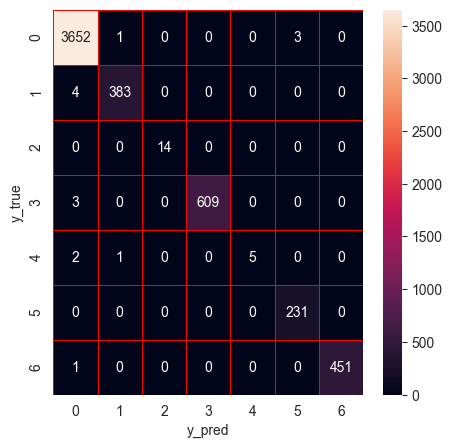

In [10]:
cm = confusion_matrix(Y_test, y_pred)
f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# XGBoost

In [11]:
xg = xgb.XGBClassifier()
X_train_x = X_train.values
X_test_x = X_test.values
xg.fit(X_train_x, Y_train)
y_pred = xg.predict(X_test_x)
print(classification_report(Y_test, y_pred))
print("Accuary of XGBoost: " + str(accuracy_score(Y_test, y_pred)))
print("Precision of XGBoost: " + str(precision_score(Y_test, y_pred, average="weighted")))
print("Recall of XGBoost: " + str(recall_score(Y_test, y_pred, average="weighted")))
print("Average F1 of XGBoost: " + str(f1_score(Y_test, y_pred, average="weighted")))
print("F1 of XGBoost for each type of attack" + str(f1_score(Y_test, y_pred, average=None)))
xg_f1 = f1_score(Y_test, y_pred, average=None)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3656
           1       0.99      0.99      0.99       387
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00       612
           4       1.00      0.75      0.86         8
           5       0.99      1.00      0.99       231
           6       1.00      1.00      1.00       452

    accuracy                           1.00      5360
   macro avg       1.00      0.96      0.98      5360
weighted avg       1.00      1.00      1.00      5360

Accuary of XGBoost: 0.9970149253731343
Precision of XGBoost: 0.9970215393644385
Recall of XGBoost: 0.9970149253731343
Average F1 of XGBoost: 0.9969887885881288
F1 of XGBoost for each type of attack[0.99794942 0.99222798 1.         0.99673203 0.85714286 0.99354839
 0.99778271]


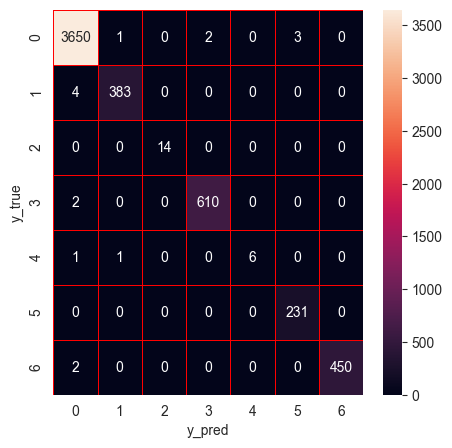

In [12]:
cm = confusion_matrix(Y_test, y_pred)
f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# CatBoost

In [13]:
cb = cbt.CatBoostClassifier()
cb.fit(X_train, Y_train)
y_pred = cb.predict(X_test)
print(classification_report(Y_test, y_pred))
print("Accuary of XGBoost: " + str(accuracy_score(Y_test, y_pred)))
print("Precision of XGBoost: " + str(precision_score(Y_test, y_pred, average="weighted")))
print("Recall of XGBoost: " + str(recall_score(Y_test, y_pred, average="weighted")))
print("Average F1 of XGBoost: " + str(f1_score(Y_test, y_pred, average="weighted")))
print("F1 of XGBoost for each type of attack" + str(f1_score(Y_test, y_pred, average=None)))
cb_f1 = f1_score(Y_test, y_pred, average=None)

Learning rate set to 0.092915
0:	learn: 1.5602022	total: 351ms	remaining: 5m 50s
1:	learn: 1.3398179	total: 433ms	remaining: 3m 36s
2:	learn: 1.1668477	total: 504ms	remaining: 2m 47s
3:	learn: 1.0374507	total: 582ms	remaining: 2m 24s
4:	learn: 0.9388019	total: 659ms	remaining: 2m 11s
5:	learn: 0.8577296	total: 727ms	remaining: 2m
6:	learn: 0.7891902	total: 805ms	remaining: 1m 54s
7:	learn: 0.7215396	total: 880ms	remaining: 1m 49s
8:	learn: 0.6715197	total: 940ms	remaining: 1m 43s
9:	learn: 0.6307658	total: 995ms	remaining: 1m 38s
10:	learn: 0.5889539	total: 1.06s	remaining: 1m 35s
11:	learn: 0.5432558	total: 1.12s	remaining: 1m 32s
12:	learn: 0.5123750	total: 1.18s	remaining: 1m 29s
13:	learn: 0.4779019	total: 1.24s	remaining: 1m 27s
14:	learn: 0.4468946	total: 1.31s	remaining: 1m 25s
15:	learn: 0.4225944	total: 1.38s	remaining: 1m 24s
16:	learn: 0.3952934	total: 1.45s	remaining: 1m 23s
17:	learn: 0.3701547	total: 1.52s	remaining: 1m 22s
18:	learn: 0.3472248	total: 1.59s	remaining: 1m 

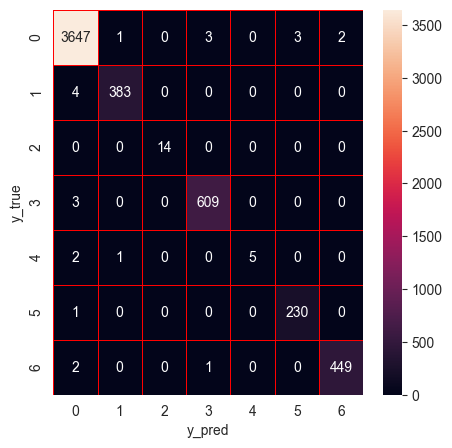

In [14]:
cm = confusion_matrix(Y_test, y_pred)
f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [16]:
#Her sumf için en iyi sonucu veren model Listesi
model = []
for i in range(len(lg_f1)):
    if max (lg_f1[i], xg_f1[i], cb_f1[i]) == lg_f1[i]:
        model.append(lg)
    elif max (lg_f1[i],xg_f1[i], cb_f1[i]) == xg_f1[i]:
        model.append(xg)
    else:
        model.append( cb)

In [22]:
def LCCDE(X_test, y_test, m1, m2, m3):
    i= 0
    t= []
    m=[]
    yt=[]
    yp=[]
    l = []
    pred_1=[]
    pro_1 = []
    
    #her sınıf için normal ve atak paketi olarak en iyi modeli bulmak
    for xi, yi, in stream.iter_pandas(X_test, y_test):
        
        xi2 = np.array(list(xi.values()))
        y_pred1 = m1.predict(xi2.reshape(1, -1)) # model 1 (LightGBM model üzerinde tahminde bulunur xi)
        y_pred1 = int(y_pred1[0])
        y_pred2 = m2.predict(xi2.reshape(1, -1)) # model 2 (XGBoost) model üzerinde tahminde bulunur. xi
        y_pred2 = int(y_pred2[0])
        y_pred3 = m3.predict(xi2.reshape(1, -1)) # model 3 (Catboost) model üzerinde tahminde bulunur. xi
        y_pred3 = int(y_pred3[0])
        
        p1 = m1.predict_proba(xi2.reshape(1, -1)) # model 1'in tahmin olasılığı (güven) listesi
        p2 = m2.predict_proba(xi2.reshape(1, -1)) # model 2'in tahmin olasılığı (güven) listesi
        p3 = m3.predict_proba(xi2.reshape(1, -1)) # model 3'in tahmin olasılığı (güven) listesi
        
        # Her ML modeli için tüm sınıflar arasında en yüksek tahmin olasılığının bulunması
        y_pred_p1 = np.max(p1)
        y_pred_p2 = np.max(p2)
        y_pred_p3 = np.max(p3)
        
        if y_pred1 == y_pred2 == y_pred3: # üç modelin de tahmin edilen sınıfları aynı ise:
            y_pred = y_pred1 # Bu tahmin edilen sınıfı son tahmin edilen sınıf olarak kullan
            
        elif y_pred1 != y_pred2 !=y_pred3: # değilse eğer, üç modelin de tahmin edilen sınıfları farklıysa:
            # Her tahmin modeli için, tahmin edilen sınıfın orjinal ML modelinin en iyi sonuç veren modelle aynı
            if model[y_pred1] == m1: # sınıflar aynı ve en iyi sonuç modeli 1 ise: (LightGBM)
                l.append(m1)
                pred_1.append(y_pred1) # tahmin edilen sınıfı kaydet
                pro_1.append(y_pred_p1) # güven listesini kaydet
                
            if model[y_pred2] ==m2: # sınıflar aynı ve en iyi sonuç model 2 ise: (XGBoost)
                l.append(m2)
                pred_1.append(y_pred2)
                pro_1.append(y_pred_p2)
                
            if model[y_pred3]==m3: # sınıflar aynı ve en iyi sonuç model 3 ise: (CatBoost)
                l.append(m3)
                pred_l.append(y_pred3)
                pro_l.append(y_pred_p3)
            
            if len(l)==0: # olasılık listesi boş olamaz
                pro_l =[y_pred_p1,y_pred_p2,y_pred_p3]
            
            elif len(l)==1: # Tahmin edilen her sınıf için orjinal modelin ve en iyi sonuç veren modelin yalnız
                y_pred=pred_1[0] # En iyi modelin tahmin edilen sınıfını son tahmin sınıfı olarak kullan
            else: # Orjinal tahmin modelinin hiçbir çifti veya birden fazla çifti yada tahmin edilen her sınıf
                max_p= max(pro_1) # En yüksek güven listesini bul.
                
                # Son tahmin sınıfı olarak en yüksek güvenle tahmin edilen sınıfı kullan
                if max_p == y_pred_p1:
                    y_pred = y_pred1
                elif max_p == y_pred_p2:
                    y_pred = y_pred2
                else:
                    y_pred = y_pred3
                
        else: #Tahmin edilen iki sınıf aynı, diğeri farklı ise<.
            n= mode([y_pred1,y_pred2,y_pred3]) # Çoğunluk oyu ile tahmin edilen sınıfı bul.
            y_pred = model[n].predict(xi2.reshape(1, -1)) # en iyi sonuç veren modelin tahmin edilen sınıfını
            y_pred = int(y_pred[0])
            
        yt.append(yi)
        yp.append(y_pred) # Test edilen tüm örnekler için tahmin edilen sınıfları kaydet
    return yt, yp

In [23]:
# önerilen modelin kurulması
yt, yp = LCCDE(X_test, Y_test, m1=lg, m2=xg, m3=cb)

In [24]:
print("Accuracy of LCCDE: " + str(accuracy_score(yt,yp)))
print("Precision of LCCDE: " + str(precision_score(yt,yp, average='weighted')))
print("Recall of LCCDE: " + str(recall_score(yt,yp, average='weighted')))
print("Average F! of LCCDE: " + str(f1_score(yt,yp, average='weighted')))
print("F1 of LCCDE for each type of attack: " + str(f1_score(yt,yp, average=None)))

Accuracy of LCCDE: 0.9972014925373134
Precision of LCCDE: 0.9972097866450415
Recall of LCCDE: 0.9972014925373134
Average F! of LCCDE: 0.9971375469425295
F1 of LCCDE for each type of attack: [0.99808691 0.99222798 1.         0.997543   0.76923077 0.99354839
 0.99889258]


In [25]:
print("F1 of LightGBM for each type of attack: " + str(lg_f1))
print("F1 of XGBoost for each type of attack: " + str(xg_f1))
print("F1 of CatBoost for each type of attack: " + str(cb_f1))

F1 of LightGBM for each type of attack: [0.99808691 0.99222798 1.         0.997543   0.76923077 0.99354839
 0.99889258]
F1 of XGBoost for each type of attack: [0.99794942 0.99222798 1.         0.99673203 0.85714286 0.99354839
 0.99778271]
F1 of CatBoost for each type of attack: [0.99712919 0.99222798 1.         0.99428571 0.76923077 0.99137931
 0.9944629 ]
